plot time evolution of momentum distribution for different laser beam radii

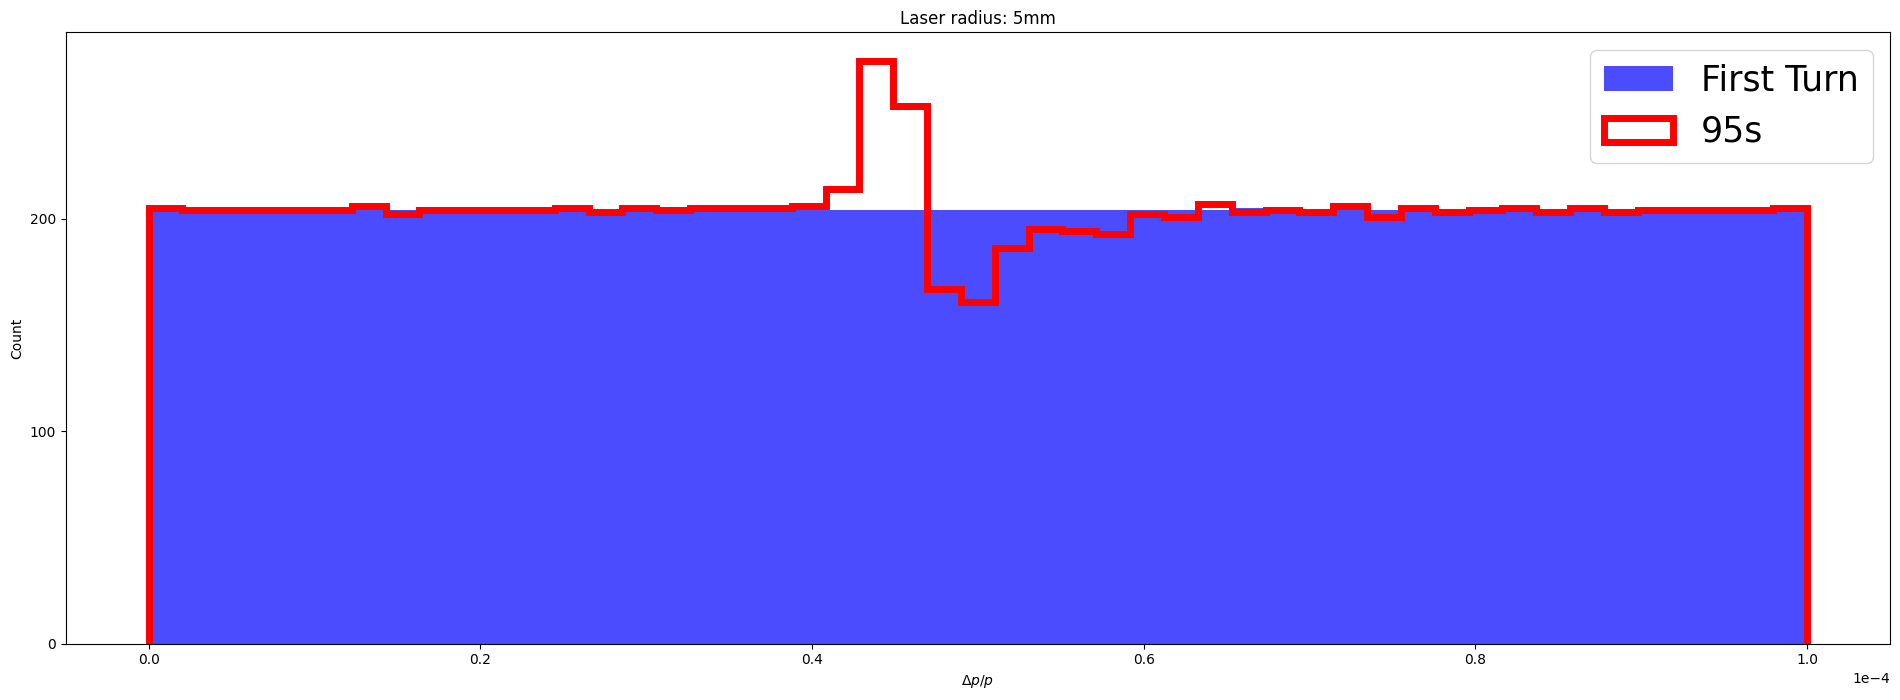

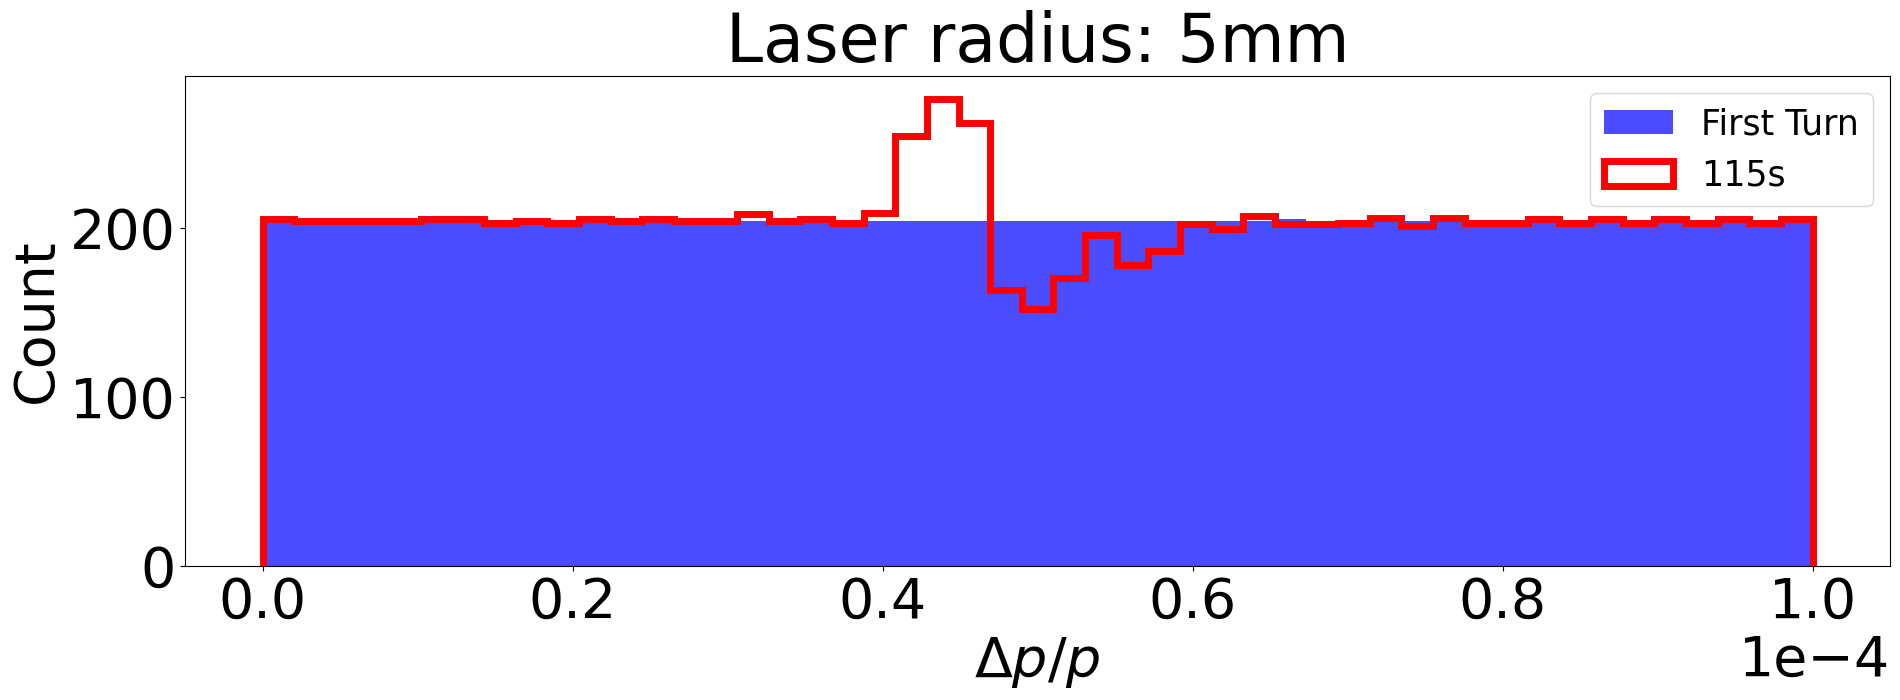

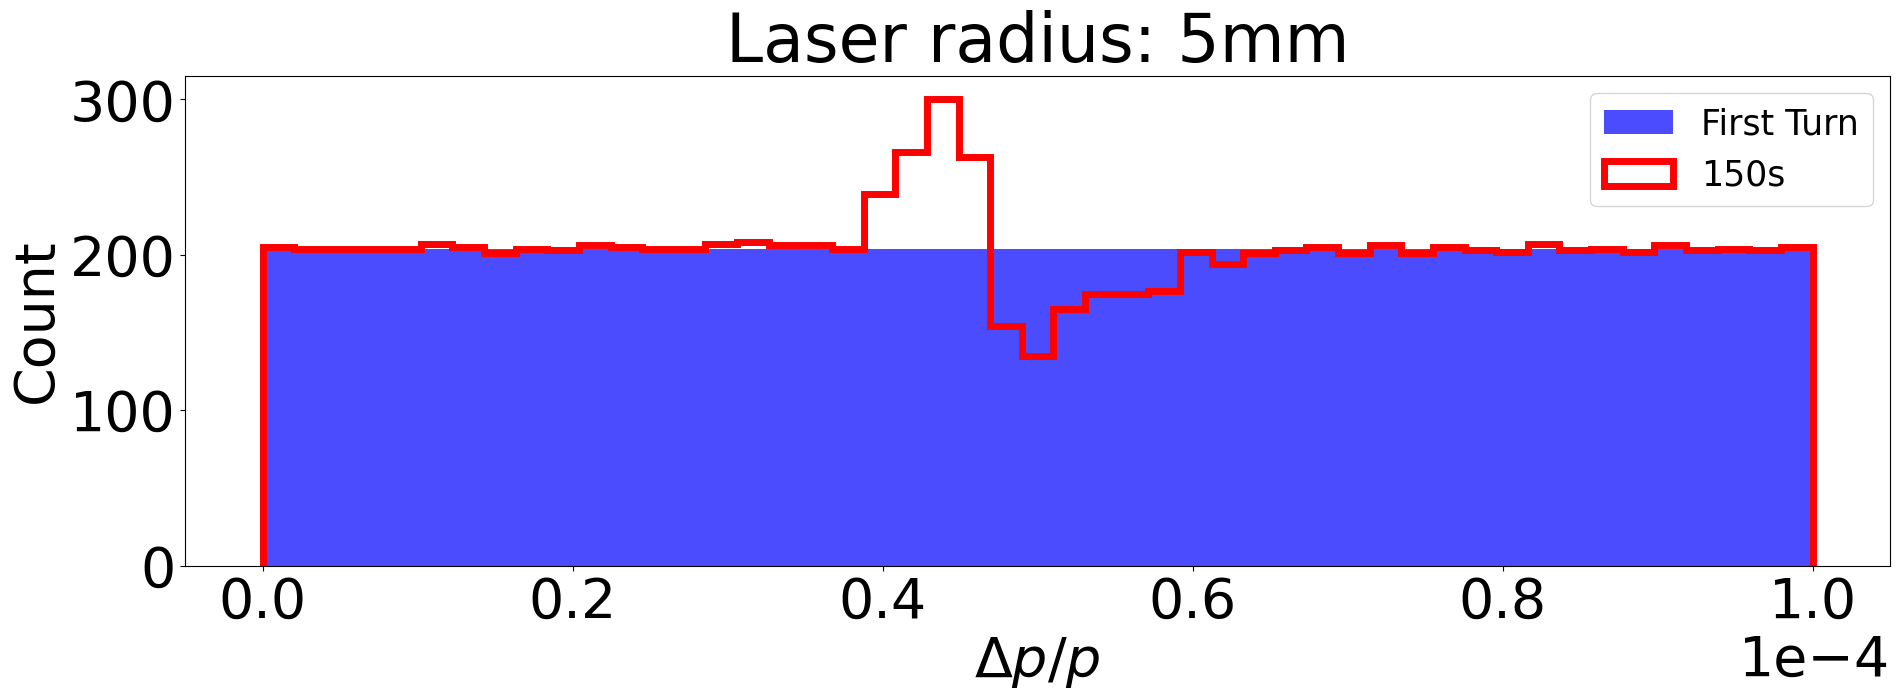

In [1]:
import numpy as np
import matplotlib.pyplot as plt

radius_list = ['5mm']
# radius_list = ['no_betatron']
font_size = 40  # Set your desired font size here
legend_font_size = 25  # Set your desired legend font size here
figure_width = 20
figure_height = 8

for radius in radius_list:
    loaded_data = np.load(f'results/langzhou_data({radius}).npz')
    delta = loaded_data['delta']
    excited = loaded_data['excited']
    x = loaded_data['x'] * 1e3
    time = loaded_data['time']

    delta_first_turn = delta[0, :]
    
    one_sec = len(delta) / 70

    point_a = int(one_sec * 15)
    delta_point_a = delta[point_a]

    point_b = int(one_sec * 35)
    delta_point_b = delta[point_b]

    delta_final_turn = delta[-1, :]

    bins = np.linspace(0e-4, 1e-4, 50)
 

    # Plotting for point_a
    plt.figure(figsize=(figure_width, figure_height))
    plt.title(f'Laser radius: {radius}')
    plt.rcParams.update({'font.size': font_size})
    plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
    plt.hist(delta_point_a, bins=bins, color='red', alpha=1, label='95s', histtype='step', linewidth=5)
    plt.xlabel(r'$\Delta p/p$')
    plt.ylabel('Count')
    plt.legend(fontsize=legend_font_size)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    plt.savefig(f'Histogram_comparison({radius})_point_a.png', format='png', dpi=300)
    plt.show()

    # Plotting for point_b
    plt.figure(figsize=(figure_width, figure_height))
    plt.title(f'Laser radius: {radius}')
    plt.rcParams.update({'font.size': font_size})
    plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
    plt.hist(delta_point_b, bins=bins, color='red', alpha=1, label='115s', histtype='step', linewidth=5)
    plt.xlabel(r'$\Delta p/p$')
    plt.ylabel('Count')
    plt.legend(fontsize=legend_font_size)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    plt.savefig(f'Histogram_comparison({radius})_point_b.png', format='png', dpi=300)
    plt.show()

    # Plotting for final turn
    plt.figure(figsize=(figure_width, figure_height))
    plt.title(f'Laser radius: {radius}')
    plt.rcParams.update({'font.size': font_size})
    plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
    plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='150s', histtype='step', linewidth=5)
    plt.xlabel(r'$\Delta p/p$')
    plt.ylabel('Count')
    plt.legend(fontsize=legend_font_size)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    plt.savefig(f'Histogram_comparison({radius})_point_final.png', format='png', dpi=300)
    plt.show()


zoom in on particular case to determine the linewidth

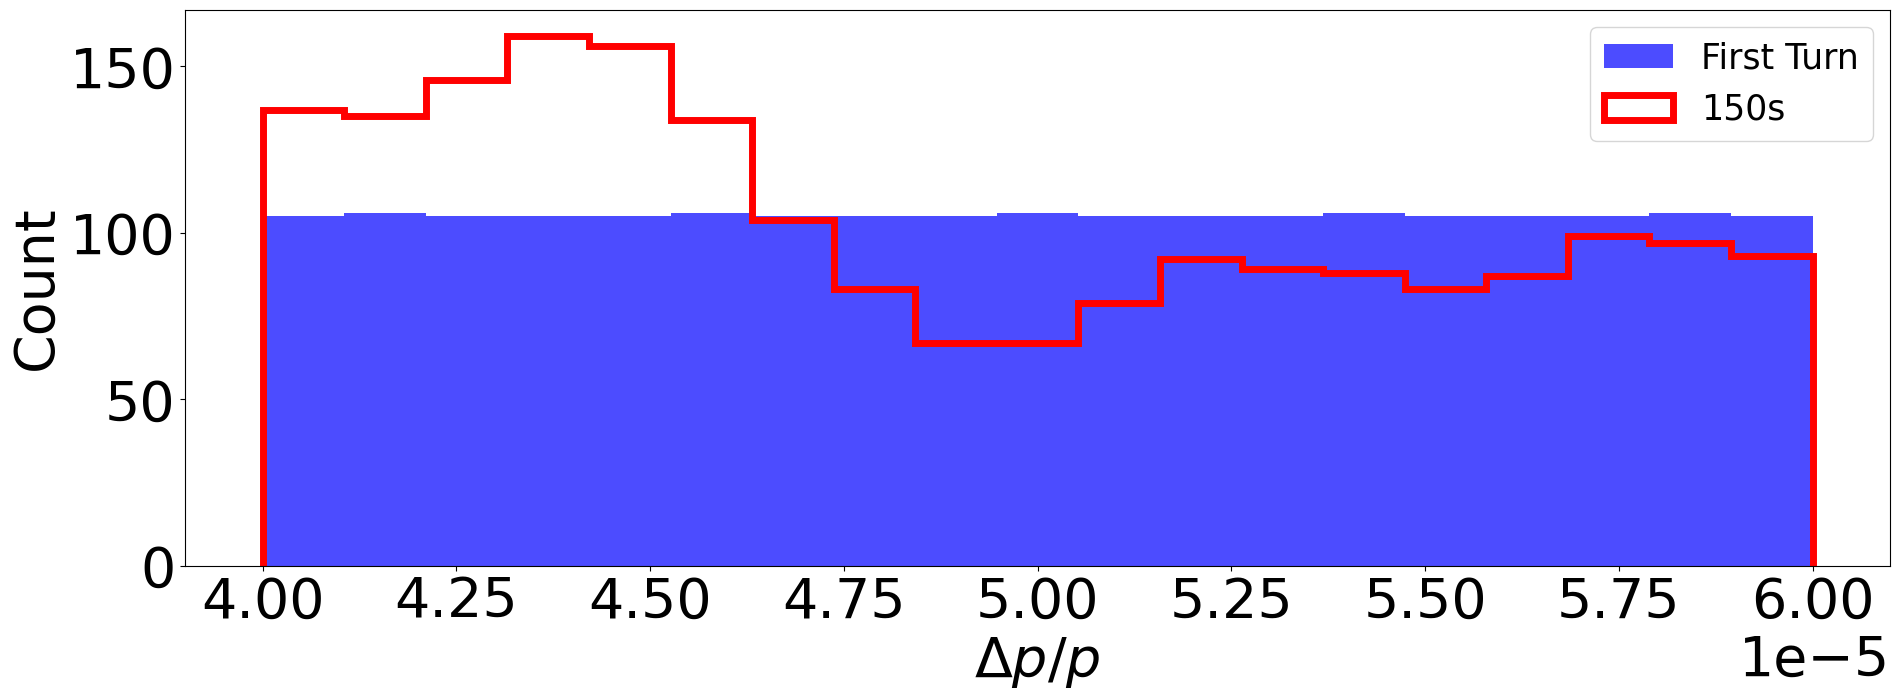

In [4]:
radius_list = ['5mm']
font_size = 40  # Set your desired font size here
legend_font_size = 25  # Set your desired legend font size here
figure_width = 20
figure_height = 8

for radius in radius_list:
    loaded_data = np.load(f'results/langzhou_data({radius}).npz')
    delta = loaded_data['delta']
    excited = loaded_data['excited']
    x = loaded_data['x'] * 1e3
    time = loaded_data['time']

    delta_first_turn = delta[0, :]
    
    one_sec = len(delta) / 70

    point_a = int(one_sec * 15)
    delta_point_a = delta[point_a]

    point_b = int(one_sec * 35)
    delta_point_b = delta[point_b]

    delta_final_turn = delta[-1, :]

    bins = np.linspace(0.4e-4, 0.6e-4, 20)
    
    # Plotting for final turn
    plt.figure(figsize=(figure_width, figure_height))
    plt.rcParams.update({'font.size': font_size})
    plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
    plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='150s', histtype='step', linewidth=5)
    plt.xlabel(r'$\Delta p/p$')
    plt.ylabel('Count')
    plt.legend(fontsize=legend_font_size)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    #plt.savefig(f'Histogram_comparison({radius})_point_final.png', format='png', dpi=300)
    plt.show()

Highest bin value for the final turn: 4.2307692307692314e-05
Height of the highest bin for the final turn: 358

Minimum bin value for the final turn: 5.000000000000001e-05
Height of the minimum bin for the final turn: 165

Bin value with height 304.0: 3.9743589743589747e-05
Height of the bin with height 304.0: 298
----------------------------------------------------------------------------
Bin value with height 207.5: 5.512820512820513e-05
Height of the bin with height 207.5: 211

FWHM_max: 2.5641025641025674e-06
FWHM_min: 5.128205128205121e-06


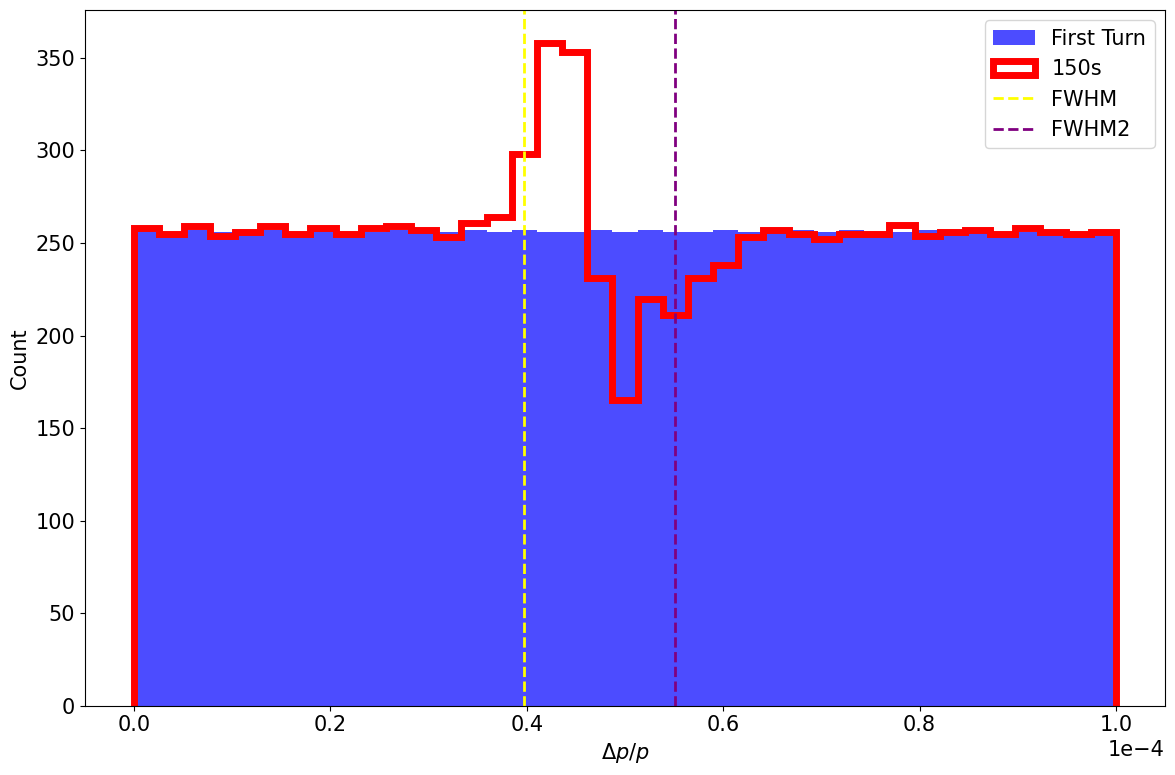

In [7]:
import numpy as np
import matplotlib.pyplot as plt

radius_list = ['5mm']
font_size = 40  # Set your desired font size here
legend_font_size = 25  # Set your desired legend font size here
figure_width = 20
figure_height = 8

for radius in radius_list:
    loaded_data = np.load(f'results/langzhou_data({radius}).npz')
    delta = loaded_data['delta']
    excited = loaded_data['excited']
    x = loaded_data['x'] * 1e3
    time = loaded_data['time']



    # Extract delta at the final turn
    delta_final_turn = delta[-1, :]
    num_bins=40
    baseline=1e4/num_bins
    bins = np.linspace(0e-4, 1e-4, num_bins)

    # Calculate the histogram for the final turn
    hist_final_turn, bin_edges_final_turn = np.histogram(delta_final_turn, bins=bins)

    # Find the index of the highest count bin for the final turn
    index_max_bin_final_turn = np.argmax(hist_final_turn)

    # Get the corresponding bin value and count for the highest bin
    max_bin_value_final_turn = (bin_edges_final_turn[index_max_bin_final_turn] + bin_edges_final_turn[index_max_bin_final_turn + 1]) / 2
    max_bin_count_final_turn = hist_final_turn[index_max_bin_final_turn]

    print(f'Highest bin value for the final turn: {max_bin_value_final_turn}')
    print(f'Height of the highest bin for the final turn: {max_bin_count_final_turn}\n')

    # Find the index of the minimum count bin for the final turn
    index_min_bin_final_turn = np.argmin(hist_final_turn)

    # Get the corresponding bin value and count for the minimum bin
    min_bin_value_final_turn = (bin_edges_final_turn[index_min_bin_final_turn] + bin_edges_final_turn[index_min_bin_final_turn + 1]) / 2
    min_bin_count_final_turn = hist_final_turn[index_min_bin_final_turn]

    print(f'Minimum bin value for the final turn: {min_bin_value_final_turn}')
    print(f'Height of the minimum bin for the final turn: {min_bin_count_final_turn}\n')

    ################################################################################################################

    desired_height = (max_bin_count_final_turn-baseline)/2+baseline

    # Find the index of the bin with the closest height to the desired value
    index_desired_height = np.argmin(np.abs(hist_final_turn - desired_height))

    # Get the corresponding bin value and count for the bin with the desired height
    desired_bin_value = (bin_edges_final_turn[index_desired_height] + bin_edges_final_turn[index_desired_height + 1]) / 2
    desired_bin_count = hist_final_turn[index_desired_height]

    print(f'Bin value with height {desired_height}: {desired_bin_value}')
    print(f'Height of the bin with height {desired_height}: {desired_bin_count}')
    print(f'----------------------------------------------------------------------------')

    #################################################################################################################

    # Instead of desired_height2
    desired_height_min_bin = (min_bin_count_final_turn - baseline) / 2 + baseline

    # Instead of index_desired_height2
    index_desired_height_min_bin = np.argmin(np.abs(hist_final_turn - desired_height_min_bin))

    # Instead of desired_bin_value2
    desired_bin_value_min_bin = (bin_edges_final_turn[index_desired_height_min_bin] + bin_edges_final_turn[index_desired_height_min_bin + 1]) / 2

    # Instead of desired_bin_count2
    desired_bin_count_min_bin = hist_final_turn[index_desired_height_min_bin]

    print(f'Bin value with height {desired_height_min_bin}: {desired_bin_value_min_bin}')
    print(f'Height of the bin with height {desired_height_min_bin}: {desired_bin_count_min_bin}\n')

    print('FWHM_max:',abs(max_bin_value_final_turn-desired_bin_value))
    print('FWHM_min:',abs(min_bin_value_final_turn-desired_bin_value_min_bin))

    # Plotting for the final turn
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 15})  # Adjust the font size if needed
    plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
    plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='150s', histtype='step', linewidth=5)
    plt.xlabel(r'$\Delta p/p$')
    plt.ylabel('Count')
    plt.legend()
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()

    # # Highlight the highest bin
    # plt.axvline(max_bin_value_final_turn, color='red', linestyle='--', linewidth=2, label='Max Bin (Final Turn)')

    # # Highlight the bin with the desired height
    # plt.axvline(min_bin_value_final_turn, color='blue', linestyle='--', linewidth=2, label='Min Bin (Final Turn)')

    plt.axvline(desired_bin_value, color='yellow', linestyle='--', linewidth=2, label='FWHM')


    plt.axvline(desired_bin_value_min_bin, color='purple', linestyle='--', linewidth=2, label='FWHM2')

    plt.legend()
    plt.show()
